**1 Sentimental analysis using NLTK-ML-Task-2**

 '''Sentiment analysis, also known as opinion mining, is the process of using␣
↪natural language processing (NLP) techniques
to determine the sentiment or emotional tone expressed in text data.
When applied to social media data, sentiment analysis can provide valuable␣
↪insights into public opinion, customer feedback,
brand perception, and more. Here's a brief overview of sentiment analysis using␣
↪social media data:
'''

'''Use a dataset of tweets or Facebook posts and
perform sentiment analysis to determine the
overall sentiment of the posts.'''

In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**Read the data**

In [4]:
df=pd.read_csv('C:\\Users\\abhin\\Downloads\\Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [6]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [9]:
df.shape

(14640, 15)

In [10]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [11]:
df['airline_sentiment_gold'].unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [12]:
df['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [13]:
df.drop('negativereason',axis=1,inplace=True)

In [15]:
cols=['airline_sentiment_gold','tweet_coord','negativereason_confidence']
df.drop(cols,axis=1,inplace=True)

In [16]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,name,negativereason_gold,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Virgin America,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Virgin America,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Virgin America,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Virgin America,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Virgin America,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,American,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,American,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,American,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,American,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [17]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [18]:
df.drop('negativereason_gold',axis=1,inplace=True)

In [19]:
cols1=['tweet_location','user_timezone']
df.drop(cols1,axis=1,inplace=True)

In [20]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

In [21]:
display(df.shape)
display(df.info())

(14640, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   airline                       14640 non-null  object 
 4   name                          14640 non-null  object 
 5   retweet_count                 14640 non-null  int64  
 6   text                          14640 non-null  object 
 7   tweet_created                 14640 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 915.1+ KB


None

In [22]:
df = df[['airline_sentiment','text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


Text(0.5, 1.0, 'Graph-1-Airline Sentiment Distribution')

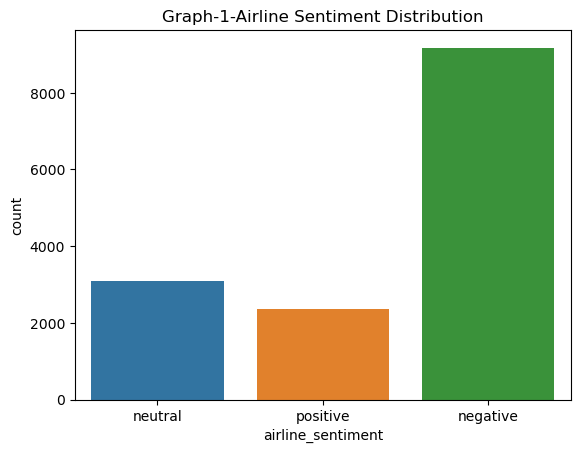

In [23]:
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1-Airline Sentiment Distribution')

C:\Users\abhin\AppData\Local\Temp\ipykernel_14304\4046151189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_word'] = df['text'].apply(lambda x : len(x.split(' ')))


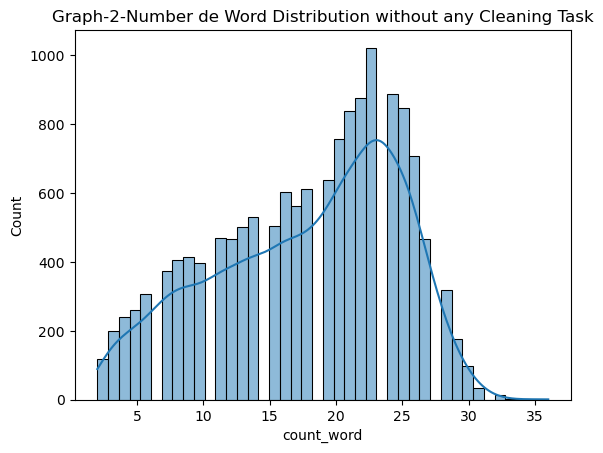

In [24]:
df['count_word'] = df['text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='count_word',kde=True)
plt.title('Graph-2-Number de Word Distribution without any Cleaning Task')
plt.show()

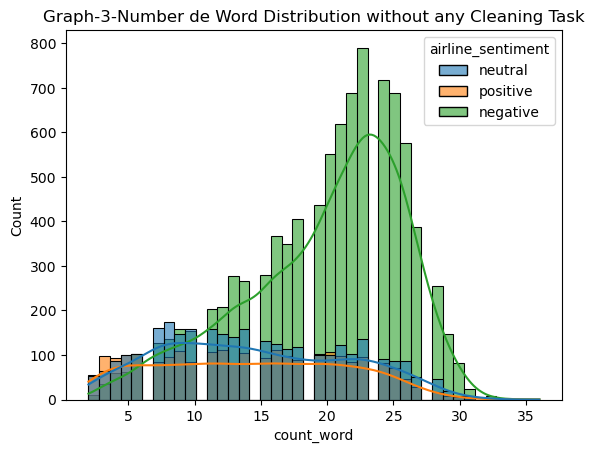

In [25]:
sns.histplot(data = df , x='count_word',hue='airline_sentiment',alpha=0.6,kde=True)
plt.title('Graph-3-Number de Word Distribution without any Cleaning Task')
plt.show()

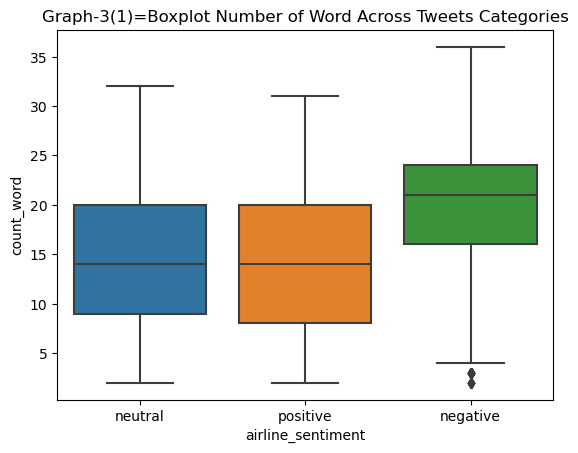

In [26]:
sns.boxplot(data = df , y='count_word',x='airline_sentiment')
plt.title('Graph-3(1)=Boxplot Number of Word Across Tweets Categories')
plt.show()

In [27]:
df.loc[np.logical_or(df['count_word']>35,df['count_word']<=5),:]

,airline_sentiment,text,count_word
0,neutral,@VirginAmerica What @dhepburn said.,4
14,positive,@VirginAmerica Thanks!,2
18,positive,I ❤️ flying @VirginAmerica. ☺️👍,5
46,neutral,@VirginAmerica DREAM http://t.co/oA2dRfAoQ2 h...,5
58,neutral,@VirginAmerica @ladygaga @carrieunderwood - Ca...,5
...,...,...,...
14312,positive,@AmericanAir awesome! Thx,3
14314,negative,"@AmericanAir yes, and rebooked incorrectly.",5
14443,neutral,@AmericanAir hi how are you,5
14600,neutral,http://t.co/EIw2sYb8Fu roberts&amp;s=1 @Americ...,3


**Preprocessing the Data**

In [28]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [31]:
# punctuation Removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)
#stopword removal
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filter_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filter_tokens)
#remove numeric
def remove_numeric(text):
    return re.sub(r'\d+','',text)
#Stemming
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)
def remove_mentions(text):
    return re.sub(r'@\w+','',text)

In [33]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed_tokens)
input_text = "walking throw the street, a passenger walked toward me, talking␣about a walked chicken on the streets"
stemmed_text = apply_stemming(input_text)
print(stemmed_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


walk throw the street , a passeng walk toward me , talking␣about a walk chicken on the street


In [35]:
apply_stemming('walking throw the street , a passenger walked toward me talking about a walked chicken on the streets')

'walk throw the street , a passeng walk toward me talk about a walk chicken on the street'

In [37]:
def text_preprocessing(text):
    sentence = remove_mentions(text)
    sentence = remove_punctuation(sentence)
    sentence = remove_stopwords(sentence)
    sentence = remove_numeric(sentence)
    sentence = apply_stemming(sentence)
    return sentence

In [38]:
text_preprocessing('walking throw the street , a passenger walked toward me␣,talking about a walked chicken on the streets')


'walk throw street passeng walk toward metalk walk chicken street'

In [39]:
df.loc[:,'new_text'] = df['text'].apply(lambda x : text_preprocessing(x))

C:\Users\abhin\AppData\Local\Temp\ipykernel_14304\3410990210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'new_text'] = df['text'].apply(lambda x : text_preprocessing(x))


C:\Users\abhin\AppData\Local\Temp\ipykernel_14304\1052658891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'new_count_word'] = df['new_text'].apply(lambda x : len(x.split(' ')))


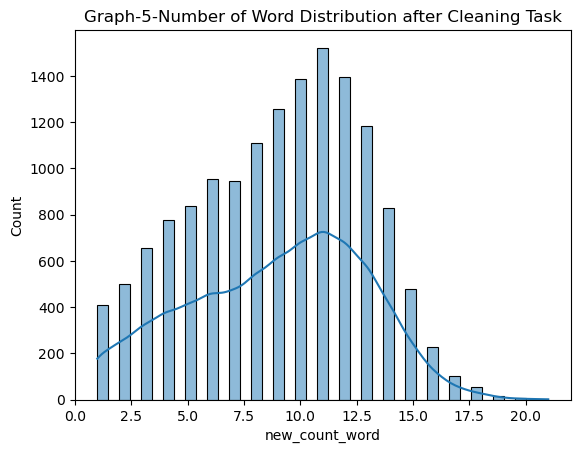

In [40]:
df.loc[:,'new_count_word'] = df['new_text'].apply(lambda x : len(x.split(' ')))
sns.histplot(data = df , x='new_count_word',kde=True)
plt.title('Graph-5-Number of Word Distribution after Cleaning Task')
plt.show()

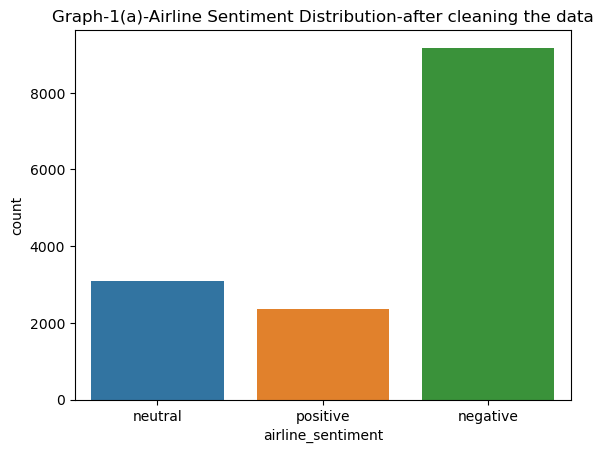

In [41]:
sns.countplot(data=df,x='airline_sentiment')
plt.title('Graph-1(a)-Airline Sentiment Distribution-after cleaning the data')
plt.show()

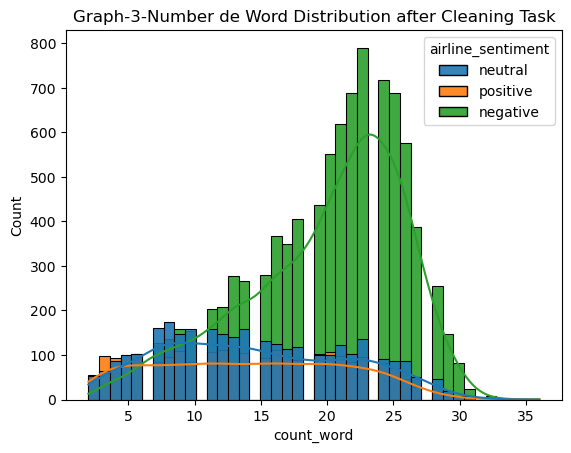

In [43]:
sns.histplot(data = df , x='count_word',hue='airline_sentiment',alpha=0.9,kde=True)
plt.title('Graph-3-Number de Word Distribution after Cleaning Task')
plt.show()